# Synthetic data

The aim of this notebook is to illustrate the PCA tool using synthetic data.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from scipy.spatial import distance
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

##### Data creation

In [2]:
# Synthetic data
N = 900
alpha = 25
beta = 10
gamma = 25
mu1 = 10
mu2 = 50
df = pd.DataFrame()
nb_comp = 5
var = 5
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.random.normal(mu1, var,N) + np.random.normal(mu2, var,N)
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 

print('Synthetic data')
display(df)

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,52.0,19.321292,68.115552,1003.032307,1702.888808
1,12.0,12.149029,40.427115,423.725718,1010.677878
2,61.0,7.974632,63.241146,809.365800,1581.028638
3,66.0,9.122824,58.106565,888.070594,1452.664136
4,16.0,5.553731,59.992106,298.843283,1499.802653
...,...,...,...,...,...
895,64.0,6.105056,62.077863,792.626408,1551.946565
896,27.0,-1.069849,60.439779,243.253765,1510.994476
897,25.0,10.563451,57.323118,514.086280,1433.077948
898,92.0,7.874758,64.255653,1116.868959,1606.391335


##### Apply PCA to Data

In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()

# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

After PCA
Singular values: [4.27282201e+01 4.21163860e+01 2.99250603e+01 1.29855739e-14
 6.50502274e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,1.976106,0.460672,1.693746,-7.299859e-16,-2.821188e-15,0.0
1,-3.804797,-1.916519,0.911835,1.357555e-15,4.393038e-15,0.0
2,0.640903,0.318685,-0.569242,9.378755e-15,-5.042825e-16,0.0
3,0.178936,-0.690512,-0.411199,4.579519e-16,-3.767509e-17,0.0
4,-1.479613,1.392762,-0.419943,-3.567633e-16,-2.077555e-17,0.0
...,...,...,...,...,...,...
895,0.419730,0.194956,-0.961916,4.708620e-16,9.372696e-17,1.0
896,-1.610317,1.627255,-1.822813,2.287480e-16,1.823897e-16,1.0
897,-1.144357,0.336655,0.412396,3.017044e-16,1.279639e-16,1.0
898,1.782982,-0.470009,-1.005150,1.760081e-16,-2.007642e-16,1.0


##### Plots

In [4]:
def plot_PCA(comp_1, comp_2):
    
    x = PCA_df.iloc[:,comp_1]
    y = PCA_df.iloc[:,comp_2]

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.25]
    rect_histy = [left_h, bottom, 0.25, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(12, 12))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    targets = ['young', 'old']

    # the scatter plot:
    for idt, _ in enumerate(targets):
        axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,comp_1], 
                   PCA_df[PCA_df['label'] == idt].iloc[:,comp_2])


    # now determine nice limits by hand:
    binwidth = 0.2
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axHistx.set_xticks([])
    axHisty.set_yticks([])

    axScatter.legend(targets)
    axScatter.grid()
    axScatter.set_xlabel('Component #'+str(comp_1+1), fontsize = 15)
    axScatter.set_ylabel('Component #'+str(comp_2+1), fontsize = 15)
    plt.show()

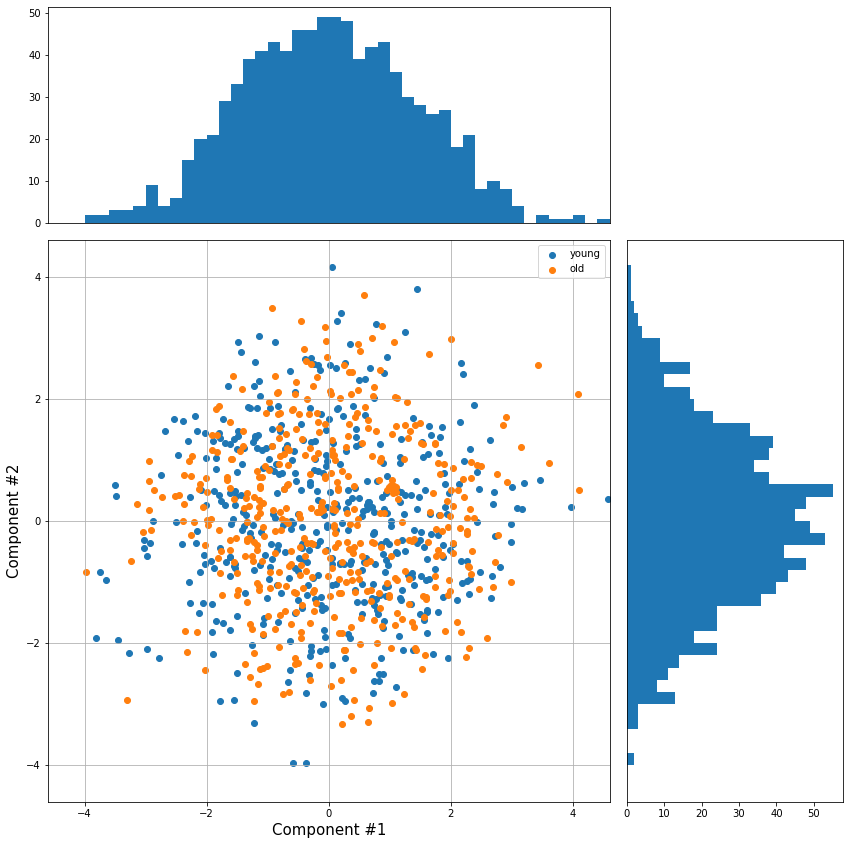

In [5]:
plot_PCA(0,1)

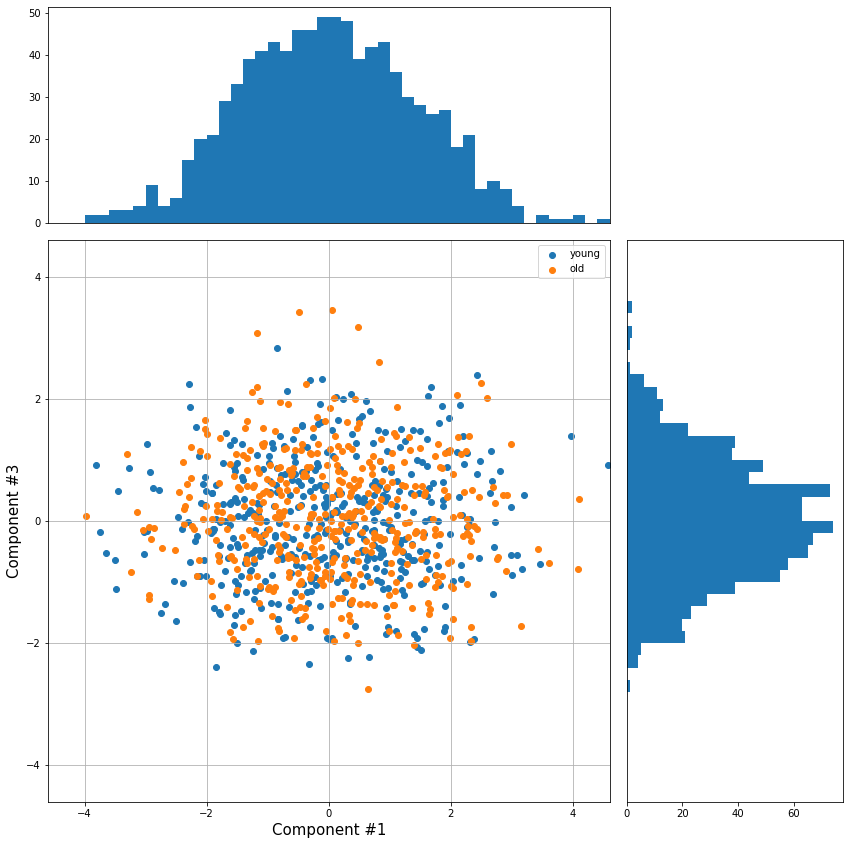

In [6]:
plot_PCA(0,2)

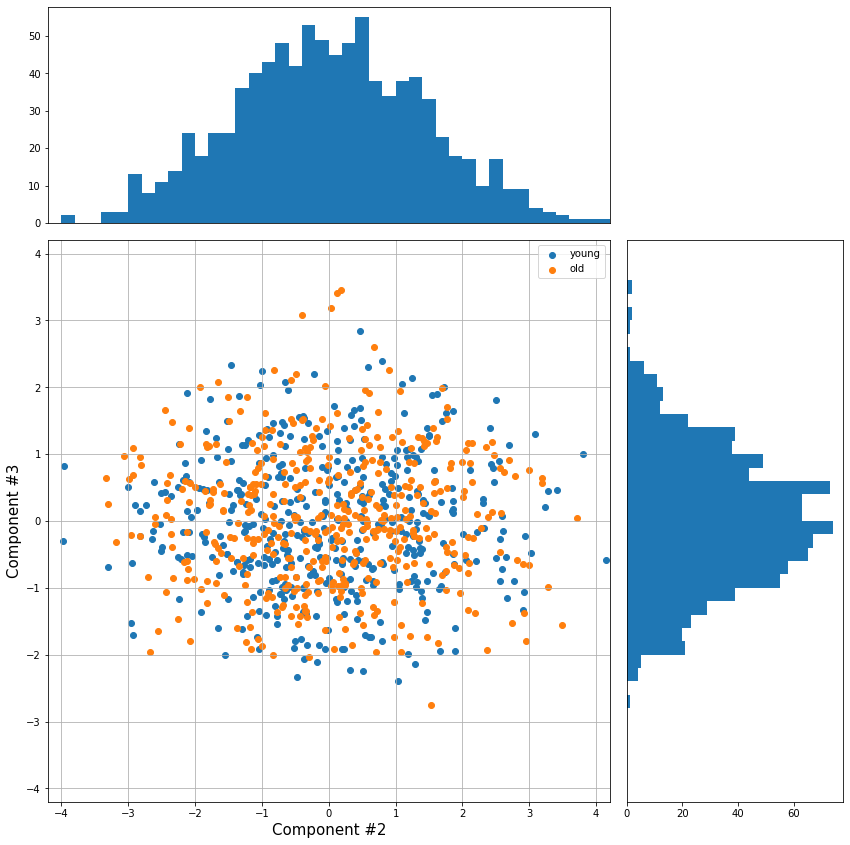

In [7]:
plot_PCA(1,2)

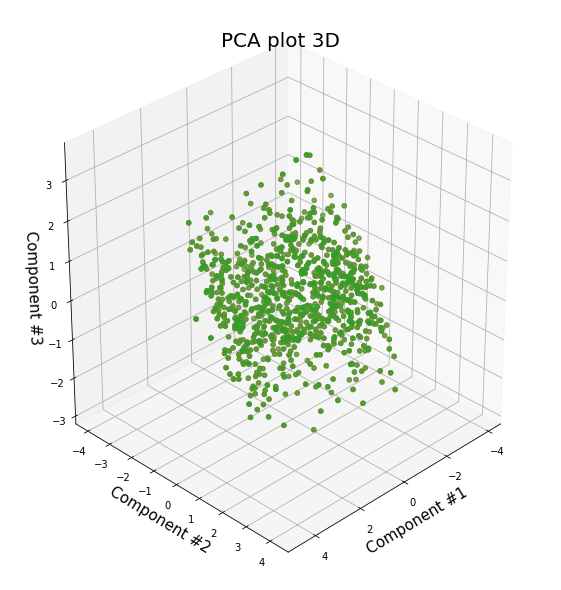

In [8]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.show()

,age,particle 1,particle 2,desease 1,disease 2
0,0.473578,0.206504,0.483345,0.515592,0.483345
1,-0.447332,-0.184357,0.516093,-0.482911,0.516093
2,-0.387684,0.921758,-0.005064,-0.003595,-0.005064
3,0.029113,0.012121,-0.706402,-0.031595,0.706402
4,0.651515,0.271264,0.031565,-0.707072,-0.031565


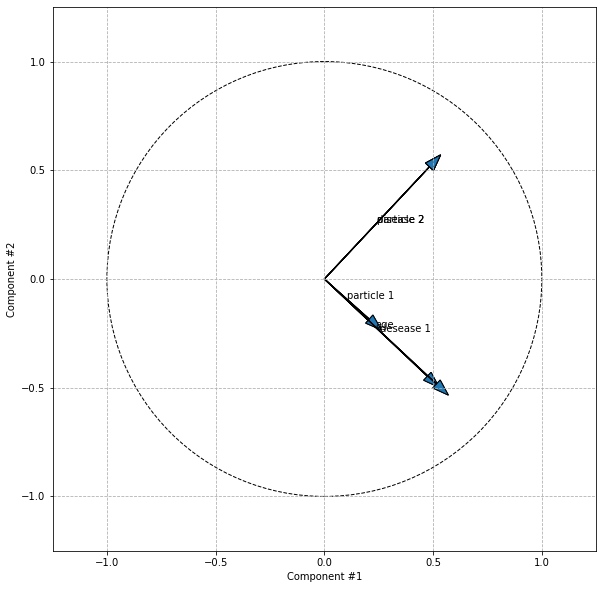

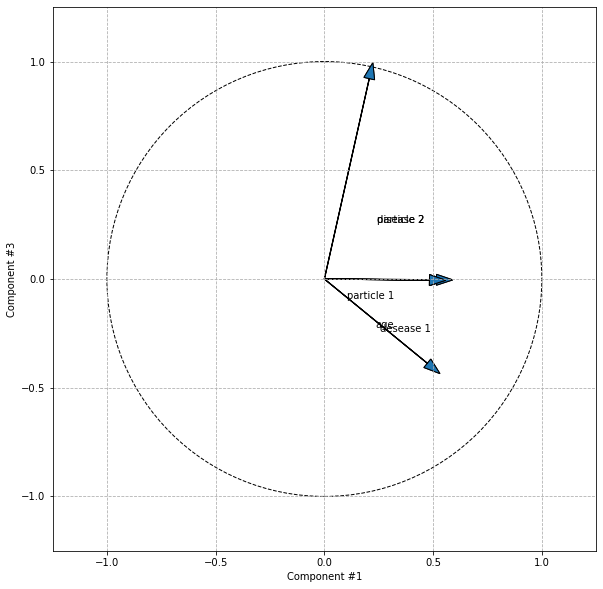

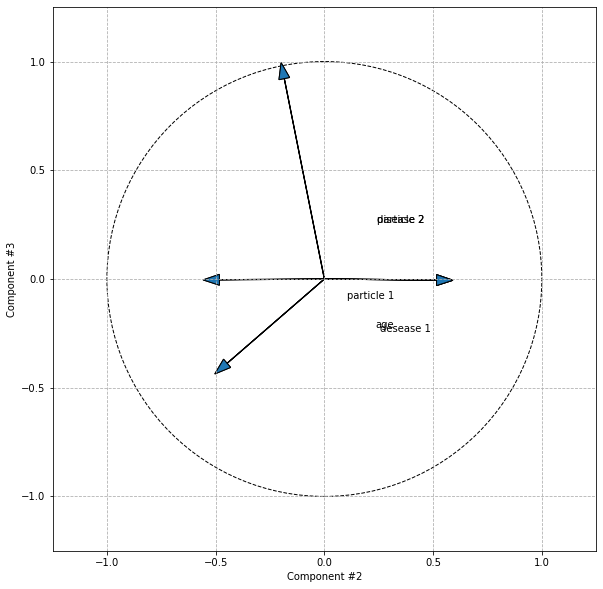

In [9]:
test_df = (df-df.mean())/df.std()
test_df = test_df[test_df.columns[:-1]]

gla = pd.DataFrame(data=[[pca.components_[c,n] for n in range(pca.n_components_)] for c in range(pca.n_components_)],
             index=[0,1,2,3,4],
             columns = test_df.columns)
display(gla)


# Plot 0 vs 1
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in test_df:
    ax.annotate(c, xy=(gla[c][0]/2, gla[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, gla[c][0], gla[c][1], head_width=0.05))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()

# Plot 0 vs 2
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in test_df:
    ax.annotate(c, xy=(gla[c][0]/2, gla[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, gla[c][0], gla[c][2], head_width=0.05))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #1')
plt.ylabel('Component #3')
plt.show()

# Plot 1 vs 2
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in test_df:
    ax.annotate(c, xy=(gla[c][0]/2, gla[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, gla[c][1], gla[c][2], head_width=0.05))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #2')
plt.ylabel('Component #3')
plt.show()

In [10]:
# Square cosine see: https://biosakshat.github.io/pca.html
gla = pd.DataFrame(data=pca.components_**2, index=[0,1,2,3,4],  columns= test_df.columns)
gla

,age,particle 1,particle 2,desease 1,disease 2
0,0.224276,0.042644,0.233622,0.265835,0.233622
1,0.200106,0.033988,0.266352,0.233203,0.266352
2,0.150299,0.849637,0.000026,0.000013,0.000026
3,0.000848,0.000147,0.499004,0.000998,0.499004
4,0.424472,0.073584,0.000996,0.499951,0.000996
